# Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

# Import modules

In [73]:
!pip install scikit-learn==1.4.2

Defaulting to user installation because normal site-packages is not writeable


In [74]:
import sklearn
print(sklearn.__version__)

1.4.2


In [75]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Loading the dataset

In [76]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
# to display statistics about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
# to display basic info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
# to display no. of sample in each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [81]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

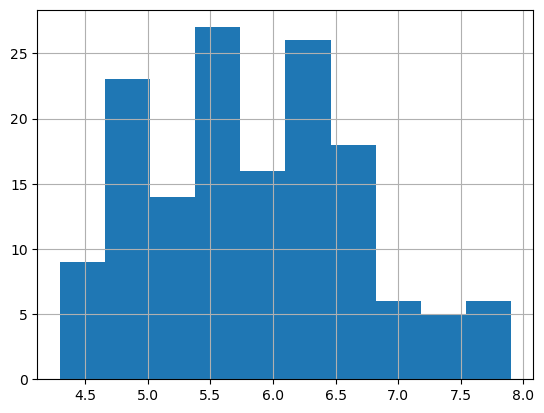

In [82]:
# histogram
df['SepalLengthCm'].hist()

<Axes: >

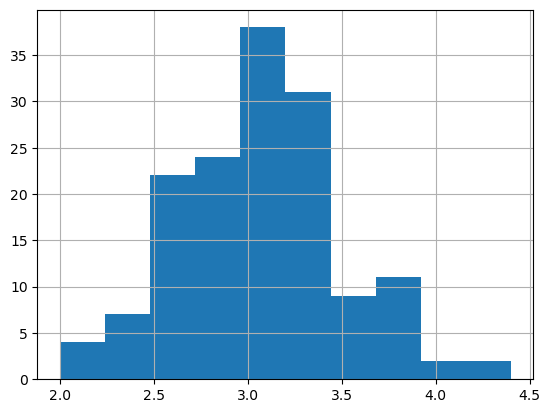

In [83]:
df['SepalWidthCm'].hist()

<Axes: >

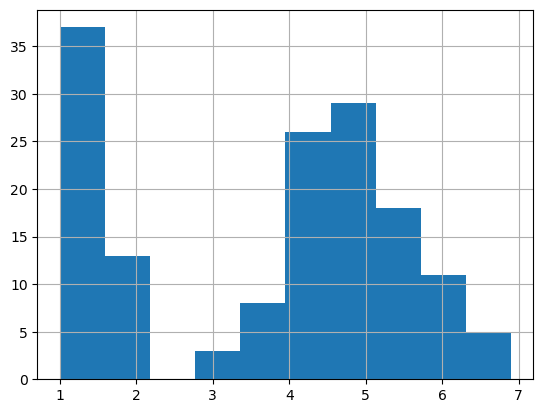

In [84]:
df['PetalLengthCm'].hist()

<Axes: >

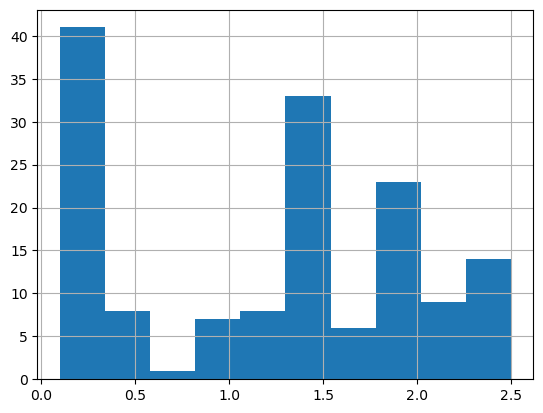

In [85]:
df['PetalWidthCm'].hist()

<Axes: >

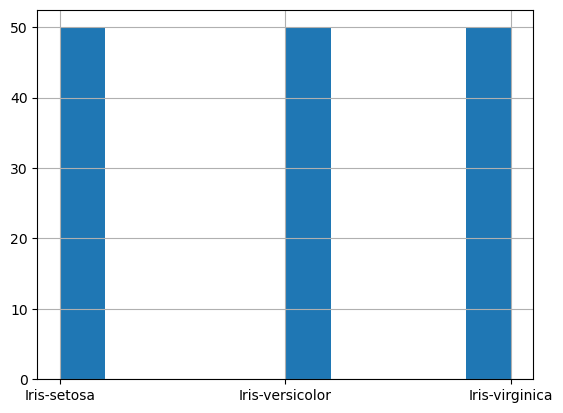

In [86]:
df['Species'].hist()

In [87]:
# scatterplot
colors = ['red', 'orange', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

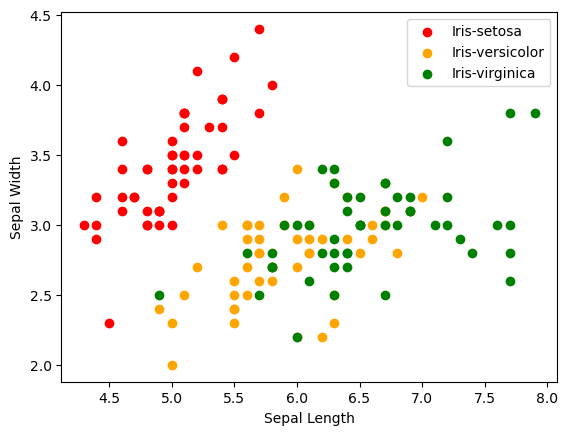

In [88]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

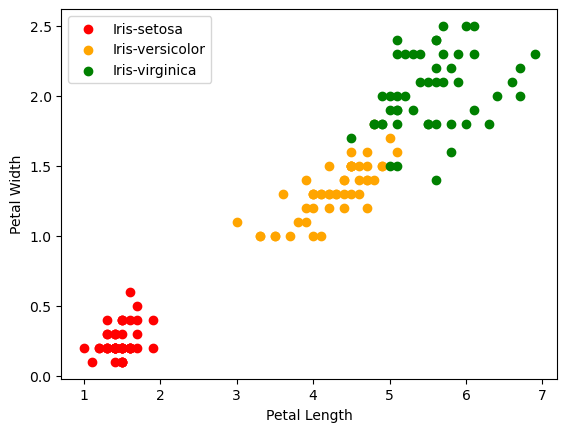

In [89]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

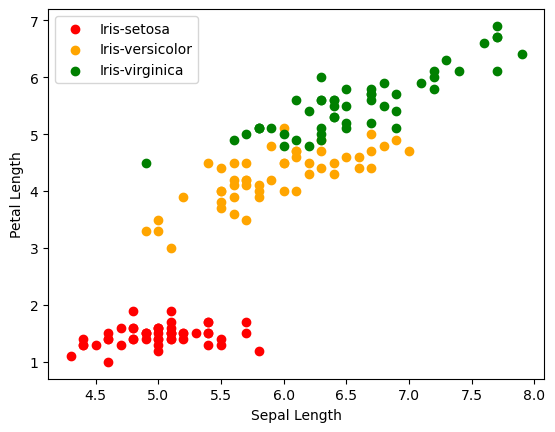

In [90]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

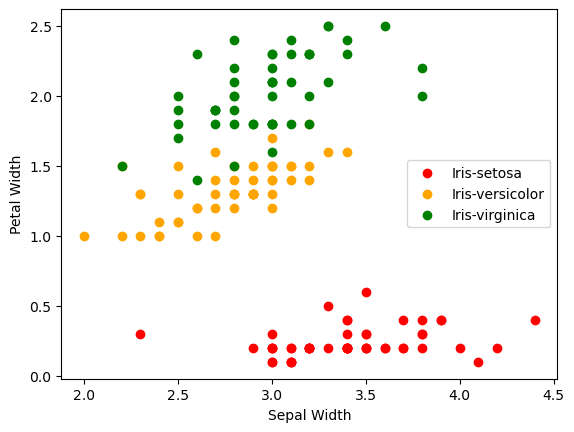

In [91]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [92]:
# Encode the 'Species' column
# label_encoder = LabelEncoder()
# df['Species'] = label_encoder.fit_transform(df['Species'])

# # Compute the correlation matrix
# df.corr()

In [93]:
# corr = df.corr()
# fig, ax = plt.subplots(figsize=(5,4))
# sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [94]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Model Training

In [95]:
from sklearn.model_selection import train_test_split
# train - 70%
# test - 30%
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [96]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [97]:
# model training
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [98]:
# print matric to get performance
print("Accuracy : ", model.score(x_test, y_test) * 100)

Accuracy :  93.33333333333333


In [99]:
# knn - k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [100]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [101]:
# print metric to get performance
print("Accuracy : ", model.score(x_test, y_test) * 100)

Accuracy :  93.33333333333333


In [102]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [103]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
print("Accuracy : ", model.score(x_test, y_test)*100)

Accuracy :  93.33333333333333


In [105]:
# save the model
import pickle
filename = "savedModel.sav"
pickle.dump(model, open(filename, 'wb'))

In [106]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
66,5.6,3.0,4.5,1.5
72,6.3,2.5,4.9,1.5
105,7.6,3.0,6.6,2.1
62,6.0,2.2,4.0,1.0
140,6.7,3.1,5.6,2.4


In [107]:
load_model = pickle.load(open(filename, 'rb'))

In [108]:
load_model.predict([[6.1,2.8,4.0,1.3]])[0]

C:\Users\N1C\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Iris-versicolor'